In [1]:
import pickle as pkl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import squidpy as sq

In [2]:
fin = open('results/ligrec_results/m_fine_ligrec.pkl', 'rb')
res_m = pkl.load(fin)

fin = open('results/ligrec_results/t_fine_ligrec.pkl', 'rb')
res_t = pkl.load(fin)

gfracs_M = pd.read_csv('results/gene_fracs_M_fine_grained.csv', index_col=0)
gfracs_T = pd.read_csv('results/gene_fracs_T_fine_grained.csv', index_col=0)

In [3]:
pm_df = res_m['pvalues']
one_row = pm_df.iloc[31,:]
cellnames = one_row['CD4 T cells'].index.tolist()
cellnames

['Arterial endothelial cells',
 'CD4 T cells',
 'CD8 T cells',
 'Capillary endothelial cells',
 'Chief cells',
 'Dendritic cells',
 'Dysplasia-carcinoma',
 'Fibroblasts, CAF',
 'Fibroblasts, NAF',
 'Foveolar cells',
 'Gastric mucous secreting cells',
 'Gastro-intestinal metaplasia',
 'Goblet cells',
 'Lymphatic endothelial cells',
 'Macrophages',
 'Mast cells',
 'Memory B cells',
 'Monocytes',
 'Myofibroblasts-1',
 'Myofibroblasts-2',
 'NK cells',
 'Naive B cells',
 'Neuroendocrine cells',
 'Neutrophils',
 'Pericytes',
 'Plasma cells',
 'Plasmacytoid dendritic cells',
 'Proliferating T cells',
 'Secretory cells',
 'Squamous epithelium basal',
 'Squamous epithelium intermediate',
 'Squamous epithelium upper',
 'Stressed Dying T cells',
 'T regs',
 'Venous endothelial cells']

In [4]:
wm_df = res_m['means']
wt_df = res_t['means']
pm_df = res_m['pvalues']
pt_df = res_t['pvalues']

In [109]:
wm_df.shape

(1598, 1225)

In [5]:
ci = 'Plasma cells'
cj = 'Pericytes'

df = wm_df[cj,ci]
df[:, "CXCR4"]

source
CXCL12    1.707239
CXCL14    0.127990
Name: (Pericytes, Plasma cells), dtype: Sparse[float64, 0]

In [6]:
df = pm_df[cj,ci]
df[:, "CXCR4"]

source
CXCL12    0.0092
CXCL14    0.9997
Name: (Pericytes, Plasma cells), dtype: Sparse[float64, nan]

In [8]:
gfracs_M.loc[['CXCL12','CXCR4'],['Plasma cells','Pericytes']]

,Plasma cells,Pericytes
index,,
CXCL12,0.000000,0.35
CXCR4,0.009804,0.00


In [10]:
df = pm_df[ci,cj]
source_array = np.array([x[0] for x in df.index])
target_array = np.array([x[1] for x in df.index])
sigedges = np.argwhere( df < 0.01 )
gfracs_M.loc[  source_array[sigedges[11]][0], ci ]

0.0915032679738562

In [12]:
fracList_M = []
for i in range(0,df.shape[0]):
    si = source_array[i]
    ti = target_array[i]
    if (gfracs_M.loc[ si, ci ] > 0.05) and (gfracs_M.loc[ ti, cj ] > 0.05) :
        fracList_M.append(1.0)
    else:
        fracList_M.append(0.0)

In [13]:
fracList_T = []
for i in range(0,df.shape[0]):
    si = source_array[i]
    ti = target_array[i]
    if (gfracs_T.loc[ si, ci ] > 0.05) and (gfracs_T.loc[ ti, cj ] > 0.05) :
        fracList_T.append(1.0)
    else:
        fracList_T.append(0.0)

In [15]:
i = 31
si = source_array[i]
ti = target_array[i]
print(si)
print(ti)
( gfracs_M.loc[ si, ci ], gfracs_M.loc[ ti, cj ] )

TNC
ITGB3


(0.0, 0.05)

In [123]:
res_df_m = pd.DataFrame(data=0, columns=cellnames, index=cellnames)

for ci in cellnames:
    for cj in cellnames:
        df = pm_df[ci,cj]
        source_array = np.array([x[0] for x in pm_df.index])
        target_array = np.array([x[1] for x in pm_df.index])
        #if (np.sum( df < 0.01 )) > 0:
        #    print(ci + '   ' + cj)
        fracList = []
        # for each pair, check they're expressing
        for i in range(0,df.shape[0]):
            si = source_array[i]
            ti = target_array[i]
            if (gfracs_M.loc[ si, ci ] > 0.05) and (gfracs_M.loc[ ti, cj ] > 0.05) :
                fracList.append(1.0)
            else:
                fracList.append(0.0)
        fracList = np.array(fracList)
        res_df_m.loc[ci,cj] = ((df < 0.01).astype('float') * np.array(fracList)).sum()


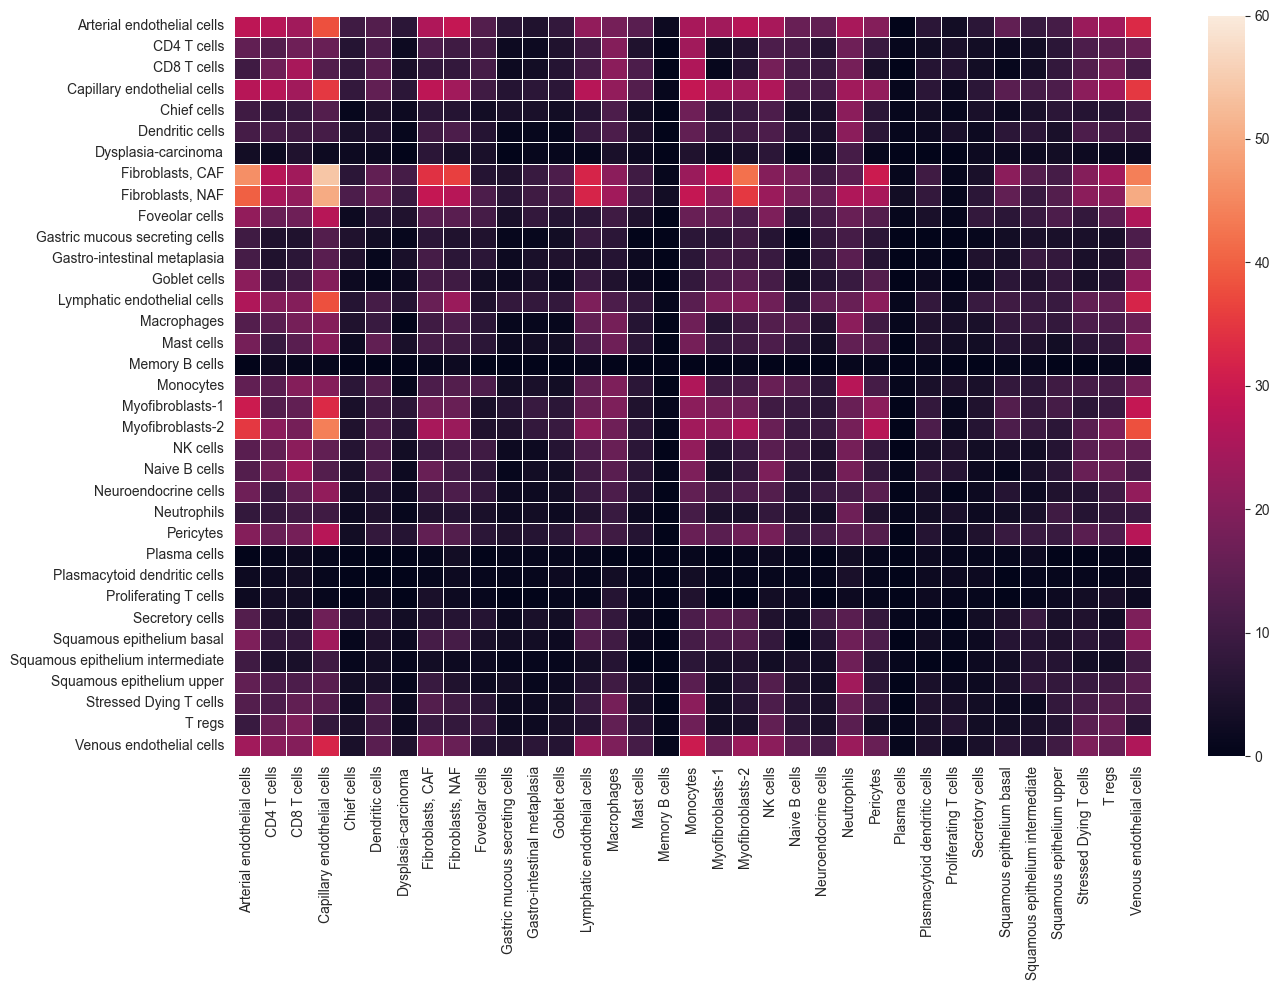

In [126]:
plt.figure(figsize = (14,10))
ax = sns.heatmap(res_df_m, linewidths=.5, vmin=0, vmax=60) #
plt.tight_layout()
plt.savefig("../../results/ligrec_results/ligrec_M_heatmap.pdf")

In [ ]:
res_df_t = pd.DataFrame(data=0, columns=cellnames, index=cellnames)

for ci in cellnames:
    for cj in cellnames:
        df = pt_df[ci,cj]
        source_array = np.array([x[0] for x in pt_df.index])
        target_array = np.array([x[1] for x in pt_df.index])
        fracList = []
        # for each pair, check they're expressing
        for i in range(0,df.shape[0]):
            si = source_array[i]
            ti = target_array[i]
            if (gfracs_T.loc[ si, ci ] > 0.05) and (gfracs_T.loc[ ti, cj ] > 0.05):
                fracList.append(1.0)
            else:
                fracList.append(0.0)
        fracList = np.array(fracList)
        res_df_t.loc[ci,cj] = ((df < 0.01).astype('float') * np.array(fracList)).sum()

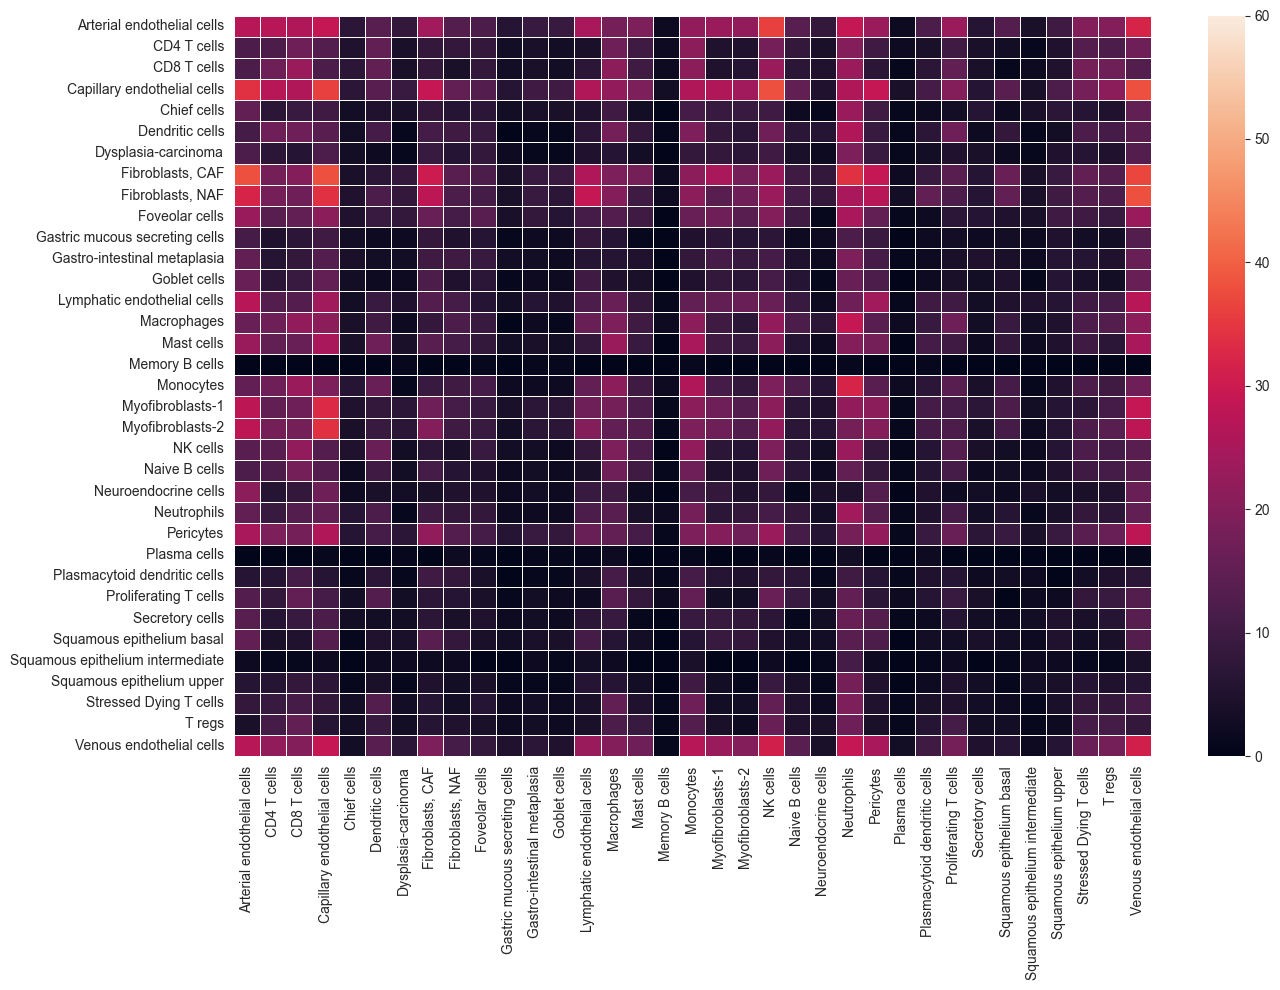

In [127]:
plt.figure(figsize = (14,10))
ax = sns.heatmap(res_df_t, linewidths=.5, vmin=0, vmax=60) # annot=True, 
plt.tight_layout()
plt.savefig("results/ligrec_results/ligrec_T_heatmap.pdf")

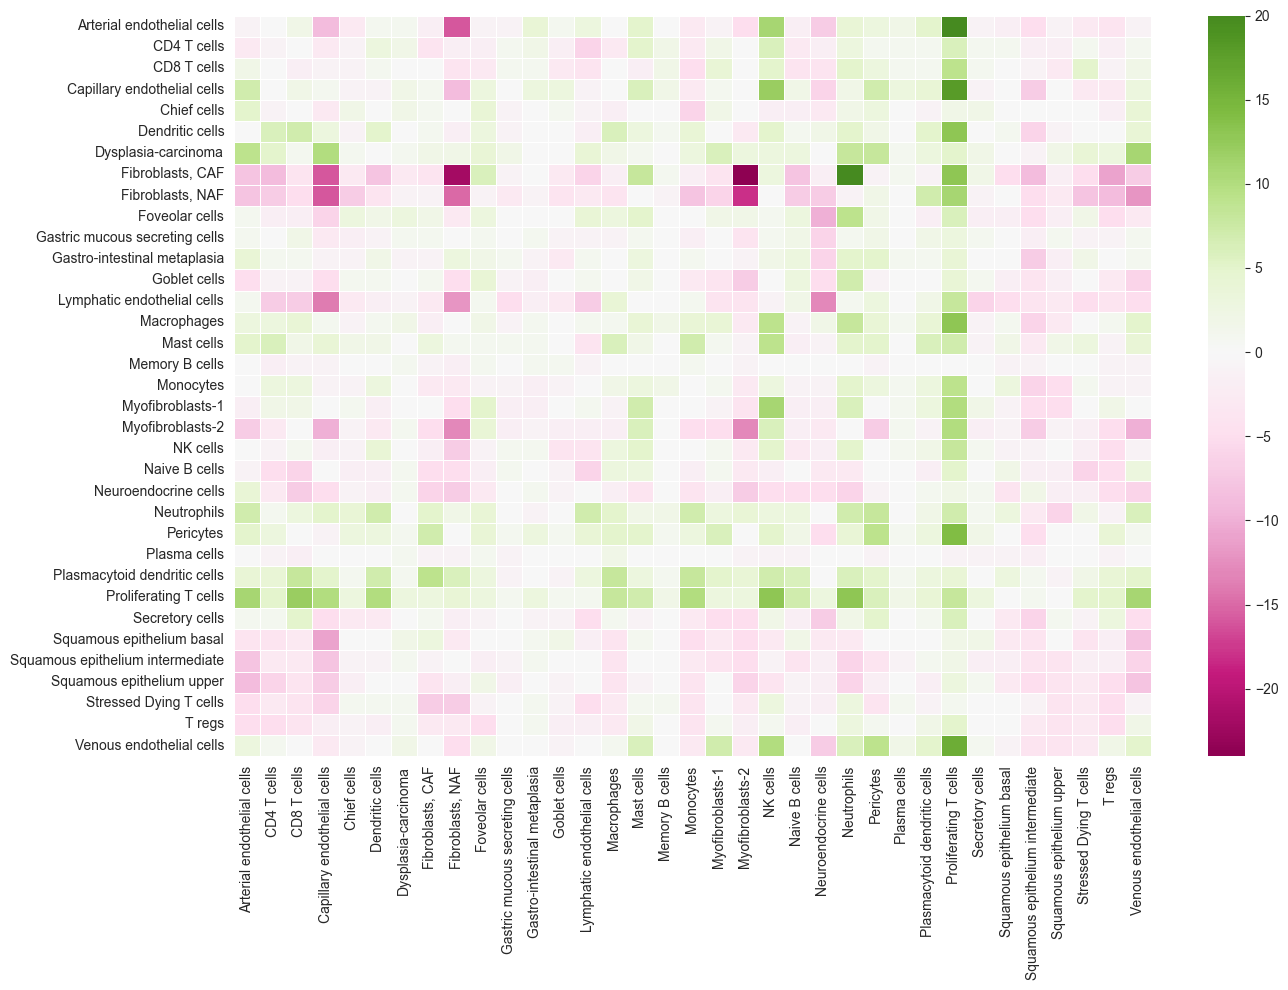

In [88]:
plt.figure(figsize = (14,10))
ax = sns.heatmap(res_df_t-res_df_m, linewidths=.5, center=0, cmap="PiYG") # annot=True, 
plt.tight_layout()
plt.savefig("results/ligrec_results/ligrec_diff_heatmap.pdf")

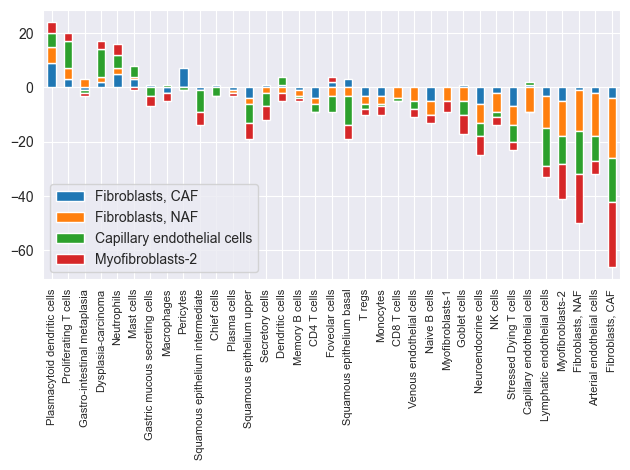

In [113]:
(res_df_t-res_df_m).sort_values('Fibroblasts, NAF', ascending=False)[['Fibroblasts, CAF',
                                                                      'Fibroblasts, NAF',
                                                                      'Capillary endothelial cells',
                                                                      'Myofibroblasts-2']].plot.bar(stacked=True, rot=0)
plt.xticks(rotation=90,fontsize=8)
plt.tight_layout()
plt.savefig("results/ligrec_results/ligrec_diff_barplots_target_stromal.pdf")

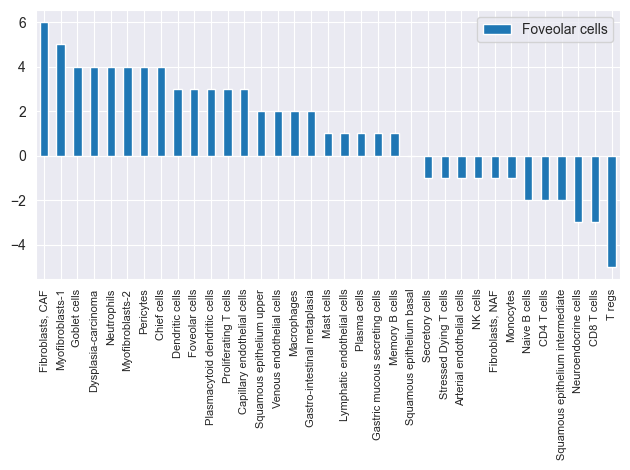

In [122]:
(res_df_t-res_df_m).sort_values('Foveolar cells', ascending=False)[['Foveolar cells']].plot.bar(stacked=True, rot=0)
plt.xticks(rotation=90,fontsize=8)
plt.tight_layout()
plt.savefig("results/ligrec_results/ligrec_diff_barplots_target_foveolar.pdf")

In [119]:
(res_df_t).transpose()['Plasma cells']

Arterial endothelial cells          0
CD4 T cells                         0
CD8 T cells                         0
Capillary endothelial cells         1
Chief cells                         0
Dendritic cells                     0
Dysplasia-carcinoma                 1
Fibroblasts, CAF                    0
Fibroblasts, NAF                    2
Foveolar cells                      1
Gastric mucous secreting cells      0
Gastro-intestinal metaplasia        1
Goblet cells                        1
Lymphatic endothelial cells         1
Macrophages                         2
Mast cells                          0
Memory B cells                      0
Monocytes                           1
Myofibroblasts-1                    0
Myofibroblasts-2                    0
NK cells                            1
Naive B cells                       0
Neuroendocrine cells                0
Neutrophils                         3
Pericytes                           0
Plasma cells                        0
Plasmacytoid

In [37]:
cit = 'Macrophages'  # 'CD4 T cells'
cjt = 'Neutrophils' # 'Capillary endothelial cells'

In [41]:
idx = np.array(pm_df[cit, cjt].tolist()) < 0.01
idx2 = np.array(pm_df[cjt, cit].tolist()) < 0.01

jdx = np.array(pt_df[cit, cjt].tolist()) < 0.01
jdx2 = np.array(pt_df[cjt, cit].tolist()) < 0.01

#take pairs that are either C_i -> C_j or C_j -> C_i
idx = [ (x or y) for (x,y) in zip(idx, idx2) ]
jdx = [ (x or y) for (x,y) in zip(jdx, jdx2) ]

In [42]:
sum(jdx) + sum(idx)

77

(0.0, 1.0)

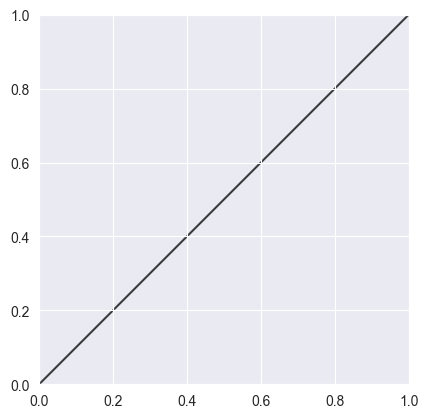

In [14]:
#sns.scatterplot(x=range(0,156), y=wt_df[cjt, cit][jdx])

vals = (wt_df[cit, cjt][jdx]).to_list()  # n to macs
vals.sort()

vals2 = (wt_df[cjt, cit][jdx]).to_list()  # mac to n
vals2.sort()

ax=sns.scatterplot(x=(vals), y=(vals2))

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

#ax=sns.scatterplot(x=range(0,156), y=np.log(vals))
#ax.set(ylabel='log weights', xlabel='sorted L-R pairs')
#plt.scatter(x=range(0,156), y=np.log(vals2), color='r')
#plt.savefig('../results/figs/macs_neut_log_weights_scatterplot.pdf')

In [ ]:
x = pt_df[cit, cjt]
x["CXCL8"]

In [ ]:
x = pm_df[cit, cjt]
x["CXCL8"]

In [ ]:
bardf = pd.DataFrame({'gene pair':['M.. CXCL8_CXCR2','M.. CXCL8_ACKR1','M.. CXCL8_CXCR1',
                                   'T.. CXCL8_CXCR2','T.. CXCL8_ACKR1','T.. CXCL8_CXCR1'],
                      'log weights':[61.7,0.0,0.0,341.7,341.7,341.7],
                      'tissue dx': ['metaplasia','metaplasia','metaplasia','carcinoma','carcinoma','carcinoma']})

ax = sns.barplot(data=bardf, x='gene pair', y='log weights', hue='tissue dx')
plt.xticks(rotation=90)


In [ ]:
sq.pl.ligrec(res_t, source_groups="Macrophages", target_groups=["Neutrophils","Monocytes"], alpha=0.005, means_range=(10,50))

C:\Users\dgibbs\CRUK_Atlas_Derived_Data\lib\site-packages\squidpy\pl\_ligrec.py:306: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  for cls, size in (pvals.groupby(level=0, axis=1)).size().to_dict().items():
C:\Users\dgibbs\CRUK_Atlas_Derived_Data\lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


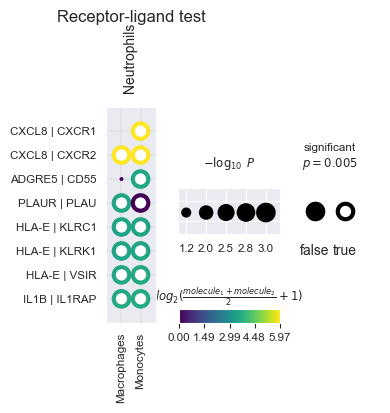

In [16]:
sq.pl.ligrec(res_m, source_groups="Macrophages", target_groups=["Neutrophils","Monocytes"], alpha=0.005, means_range=(10,500))

In [ ]:
sq.pl.ligrec(res_t, source_groups="Macrophages", alpha=0.005, means_range=(20, 500))